# Importing Requerments:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import torch
from datetime import datetime
import pandas as pd
import numpy as np
import sys
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error

In [ ]:
!pip install smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import smogn

In [ ]:
!pip install farasapy

In [ ]:
from farasa.stemmer import FarasaStemmer
import re
import string
from nltk.corpus import stopwords

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import joblib

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Dataset pre-processing:

In [ ]:
def remove_stop_words(tokens):
    file_path = r'/content/drive/MyDrive/arabic_stopwords.txt'
    with open(file_path, 'r') as f:
      content = f.read()
    filtered_text = [t for t in tokens if not t in content]
    # filtered_text = [t for t in filtered_text if not t in stopwords.words("english")]
    return filtered_text

In [ ]:
def remove_numbers_punctuations (text):
    clean_text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ', str(text))
    clean_text = re.sub(r'\w*\d\w*', ' ', str(clean_text))
    clean_text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', clean_text)
    clean_text = re.sub(r'،|؛', ' ', str(clean_text))
    return clean_text

In [ ]:
def ar_stemmer(text):    
    stemmer = FarasaStemmer()
    stemmed_text = stemmer.stem(text)
    return stemmed_text
def tokenize(text):
    tokens = text.split()
    return tokens

In [ ]:
def remove_single_double_char(text):
    no_singl_char =re.sub(r'[×©±≤≥]', ' ', str(text))
    no_singl_char =re.sub(r'\b\w{1,2}\b', ' ', str(no_singl_char))
#     simpols = '× , © , o , ≤ , ≥'
    return no_singl_char

In [ ]:
regression_dataset['clean_no_stem'] = regression_dataset.full_text.map(remove_numbers_punctuations)
regression_dataset['clean_no_stem'] = regression_dataset['clean_no_stem'].map(tokenize)
# regression_dataset['clean_no_stem'] = regression_dataset['clean_no_stem'].map(remove_stop_words)
joiner = lambda x : " ".join(x)
regression_dataset['clean_no_stem'] = regression_dataset['clean_no_stem'].map(joiner)

In [ ]:
# regression_dataset['clean_txt'] = regression_dataset['clean_txt'].map(ar_stemmer)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


100%|██████████| 241M/241M [00:23<00:00, 10.2MiB/s]


In [ ]:
def remove_extra_spaces(txt):
  return(" ".join(txt.split()))

In [ ]:
regression_dataset['clean_no_stem'] = regression_dataset['clean_no_stem'].map(remove_extra_spaces)

In [ ]:
regression_dataset.to_csv(r'/content/drive/MyDrive/decision_data3.csv', header= True)

In [ ]:
regression_dataset = pd.read_csv(r'/content/drive/MyDrive/decision_data4.csv')

In [ ]:
regression_dataset.clean_txt[1]

In [ ]:
regression_dataset.clean_no_stem[1]

In [ ]:
regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0.2             1040 non-null   int64  
 1   Unnamed: 0               1040 non-null   int64  
 2   Unnamed: 0.1             1040 non-null   int64  
 3   Article_ID               1040 non-null   float64
 4   folder                   1040 non-null   object 
 5   ar_en                    1040 non-null   object 
 6   Country                  1040 non-null   object 
 7   Title                    1040 non-null   object 
 8   Author                   1040 non-null   object 
 9   Author_certificate       1040 non-null   object 
 10  Author_specification     1040 non-null   object 
 11  work                     1033 non-null   object 
 12  co_Author                1040 non-null   object 
 13  Email                    925 non-null    object 
 14  contact                 

In [ ]:
regression_dataset = regression_dataset.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.2', 'Article_ID', 'folder', 'ar_en', 'Country',
                                                   'Title', 'Author', 'Author_certificate', 'Author_specification',
                                                   'work', 'co_Author', 'Email', 'contact', 'Scope', 'Scope_specific',
                                                   'Received_date', 'Reviewer1', 'Reviewer2', 'Reviewer3', 'Rev1_score',
                                                   'Rev2_score', 'Rev3_score', 'Volume', 'Issue', 'Date_of_editor_decision',
                                                   'full_text', 'all_authors', 'max_publication_authors', 'title', 'abstract',
                                                   'key_words', 'en_abstract', 'en_keyword', 'introduction', 'references','Result',
                                                   'num_references', 'latest_reference', 'oldest_reference','meadian_reference',
                                                   'num_figurs', 'num_tables', 'num_charts', 'num_authors', 'avg_recent_references',
                                                   'paper_len', 'ar_word_count', 'en_word_count', 'ar_word_avg', 'en_word_avg',
                                                   'num_sentences', 'avg_words_per_sentence', 'ref_mention_count','num_publication'
                                                   ], axis =1)

In [ ]:
regression_dataset = regression_dataset.reset_index(drop=True)
regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Score          1040 non-null   float64
 1   clean_txt      1040 non-null   object 
 2   clean_no_stem  1040 non-null   object 
dtypes: float64(1), object(2)
memory usage: 24.5+ KB


<AxesSubplot:xlabel='Score', ylabel='Density'>

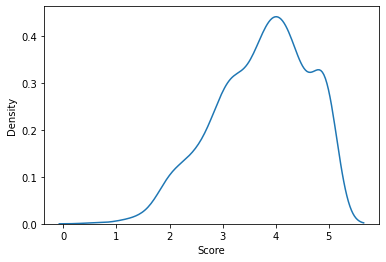

In [ ]:
sns.kdeplot(regression_dataset['Score'], label = "Original")

In [ ]:
subest_reg = regression_dataset.drop(columns = ['clean_no_stem']).reset_index(drop=True)
subest_reg.head()

In [ ]:
train_set = subest_reg.sample(frac=0.8, random_state= 46).reset_index(drop=True)
test_set = subest_reg.drop(axis=0, index=train_set.index).reset_index(drop=True)
train_set.shape , test_set.shape

((832, 2), (208, 2))

<AxesSubplot:xlabel='Score', ylabel='Density'>

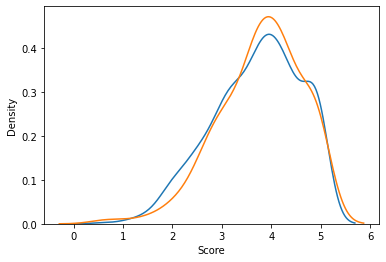

In [ ]:
sns.kdeplot(train_set['Score'], legend = "train")
sns.kdeplot(test_set['Score'], legend = "test")

In [ ]:
!pip install smogn
import smogn

In [ ]:
train_reg_smogn = smogn.smoter( data = train_set,y = 'Score', samp_method='extreme', replace=True)
# test_reg_smogn = smogn.smoter( data = test_set,y = 'Score', samp_method='extreme', replace=True)

In [ ]:
train_reg_smogn = train_reg_smogn.reset_index(drop=True)
# test_reg_smogn = test_reg_smogn.reset_index(drop=True)

train_set.shape, train_reg_smogn.shape

((832, 2), (1394, 2))

<Axes: xlabel='Score', ylabel='Density'>

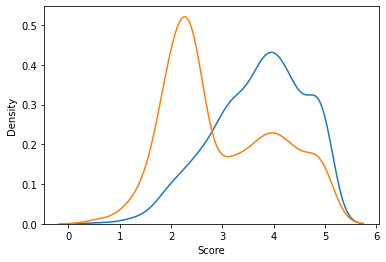

In [ ]:
sns.kdeplot(train_set['Score'], legend = "Original")
sns.kdeplot(train_reg_smogn['Score'], legend = "Modified")

<Axes: xlabel='Score', ylabel='Density'>

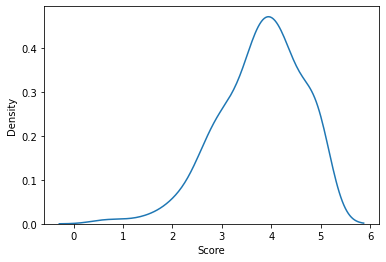

In [ ]:
sns.kdeplot(test_set['Score'], legend = "Original")
# sns.kdeplot(test_reg_smogn['Score'], legend = "Modified")

In [ ]:
# full articles dataset
X_train = train_reg_smogn.clean_txt
y_train= train_reg_smogn.Score
X_test = test_reg_smogn.clean_txt
y_test= test_reg_smogn.Score


In [ ]:
# full articles dataset
X_train = train_reg_smogn.clean_txt
y_train= train_reg_smogn.Score
X_test = test_set.clean_txt
y_test= test_set.Score

In [ ]:
tfidf = TfidfVectorizer(use_idf=True ,ngram_range=(1,2), stop_words= 'english', max_features=1000, min_df=5, max_df=0.7)
fitted_vectorizer=tfidf.fit(X_train)
tfidf_train_vectors=fitted_vectorizer.transform(X_train)
tfidf_test_vectors=fitted_vectorizer.transform(X_test)

In [ ]:
sample = fitted_vectorizer.transform([X_test[3]])

In [ ]:

joblib.dump(fitted_vectorizer,"/content/drive/MyDrive/Colab Notebooks/trained_ML_models/tfidf.pkl")

['/content/drive/MyDrive/Colab Notebooks/trained_ML_models/tfidf.pkl']

In [ ]:
loaded_tfidf = joblib.load("/content/drive/MyDrive/Colab Notebooks/trained_ML_models/tfidf.pkl")

In [ ]:

predicted = loaded_lgbm.predict(loaded_tfidf.transform([X_test[120]])) 
real = y_test[120]
predicted[0], real

(3.8207613897978514, 3.807755102040817)

# LGBMRegressor:


In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()

smoter for train set only:

In [ ]:
lgbm_scaled = TransformedTargetRegressor(regressor=LGBMRegressor(), transformer=MinMaxScaler())
lgbm_scaled_model = lgbm_scaled.fit(tfidf_train_vectors, y_train)

In [ ]:
# with scaling
y_pred = lgbm_scaled_model.predict(tfidf_test_vectors)
lgbm_scaled_model.score(tfidf_train_vectors, y_train), lgbm_scaled_model.score(tfidf_test_vectors, y_test)

(0.9407508470137179, 0.7489436802626948)

In [ ]:
# no Scaling
lgbm_model = lgbm.fit(tfidf_train_vectors, y_train)
y_pred2 = lgbm_model.predict(tfidf_test_vectors)
lgbm_model.score(tfidf_train_vectors, y_train), lgbm_model.score(tfidf_test_vectors, y_test)

(0.940750846998706, 0.7489436800797182)

In [ ]:
RMSE_1 = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_2 = (mean_squared_error(y_test, y_pred2))**(1/2)
RMSE_1, RMSE_2 

(0.4225279207895216, 0.42252792094349645)

In [ ]:
predicted = lgbm_model.predict(tfidf_test_vectors[0]) 
real = y_test[0]
predicted[0], real

(3.735193712618039, 3.7331372552352935)

In [ ]:
predicted = lgbm_model.predict(tfidf_test_vectors[33]) 
real = y_test[33]
predicted[0], real

(2.0304659263673246, 1.9566666670000004)

In [ ]:
predicted = lgbm_model.predict(tfidf_test_vectors[30]) 
real = y_test[30]
predicted[0], real

(4.014315250503915, 4.092527472384616)

In [ ]:
predicted = lgbm_model.predict(tfidf_test_vectors[49]) 
real = y_test[49]
predicted[0], real

(4.7050901717916345, 4.716333333111111)

In [ ]:
predicted = lgbm_model.predict(tfidf_test_vectors[50]) 
real = y_test[50]
predicted[0], real

(2.2957634283101434, 2.303333333)

In [ ]:
predicted = lgbm_model.predict(tfidf_test_vectors[3])
predicted[0], y_test[3]

(4.0329837090832275, 4.029999999999999)

In [ ]:
fitted_vectorizer.get_feature_names_out()

In [ ]:
feature_importances_lgbm = pd.DataFrame(lgbm_model.feature_importances_, index = fitted_vectorizer.get_feature_names_out(), columns = ['importance']).sort_values('importance', ascending=False)
fm = feature_importances_lgbm[:20]
fm

In [ ]:
feature_importances_lgbm['feature'] = feature_importances_lgbm.index
feature_importances_lgbm

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.barh(feature_importances_lgbm.feature, feature_importances_lgbm.importance, height=0.55, align="edge", color="#07a2a2");
plt.show()

smoter for train & test set:

In [ ]:
lgbm_scaled = TransformedTargetRegressor(regressor=LGBMRegressor(), transformer=MinMaxScaler())
lgbm_scaled_model = lgbm_scaled.fit(tfidf_train_vectors, y_train)

In [ ]:
# with scaling
y_pred = lgbm_scaled_model.predict(tfidf_test_vectors)
lgbm_scaled_model.score(tfidf_train_vectors, y_train), lgbm_scaled_model.score(tfidf_test_vectors, y_test)

(0.9415936450327437, 0.8205673897388506)

In [ ]:
# no Scaling
lgbm_model = lgbm.fit(tfidf_train_vectors, y_train)
y_pred2 = lgbm_model.predict(tfidf_test_vectors)
lgbm_model.score(tfidf_train_vectors, y_train), lgbm_model.score(tfidf_test_vectors, y_test)

(0.9415936450688226, 0.8205673891713255)

In [ ]:
RMSE_1 = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_2 = (mean_squared_error(y_test, y_pred2))**(1/2)
RMSE_1, RMSE_2 

(0.4582176639080139, 0.4582176646326593)

In [ ]:
predicted = lgbm_model.predict(tfidf_test_vectors[0]) 
real = y_test[0]
predicted[0], real

(3.6972394028750113, 3.7331372552352935)

In [ ]:
predicted = lgbm_model.predict(tfidf_test_vectors[3]) 
real = y_test[3]
predicted[0], real

(4.024344860263481, 4.029999999999999)

In [ ]:
predicted = lgbm_model.predict(tfidf_test_vectors[30]) 
real = y_test[30]
predicted[0], real

(3.7141639120643775, 3.7258085106382977)

In [ ]:
predicted = lgbm_model.predict(tfidf_test_vectors[49]) 
real = y_test[49]
predicted[0], real

(3.7552698726615987, 3.757540983606557)

In [ ]:
predicted = lgbm_model.predict(tfidf_test_vectors[50]) 
real = y_test[50]
predicted[0], real

(2.8194943097229324, 2.8716666666666666)

In [ ]:
predicted = lgbm_model.predict(tfidf_test_vectors[136])
predicted[0], y_test[136]

(4.2712714121279305, 4.39975268783871)

In [ ]:
fitted_vectorizer.get_feature_names_out()

In [ ]:
feature_importances_lgbm = pd.DataFrame(lgbm_model.feature_importances_, index = fitted_vectorizer.get_feature_names_out(), columns = ['importance']).sort_values('importance', ascending=False)
fm = feature_importances_lgbm[:20]
fm

In [ ]:
feature_importances_lgbm['feature'] = feature_importances_lgbm.index
feature_importances_lgbm

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.barh(feature_importances_lgbm.feature, feature_importances_lgbm.importance, height=0.55, align="edge", color="#07a2a2");
plt.show()

In [ ]:
import joblib
joblib.dump(lgbm_model,"/content/drive/MyDrive/Colab Notebooks/trained_ML_models/decision_lgbm.pkl")

['/content/drive/MyDrive/Colab Notebooks/trained_ML_models/decision_lgbm.pkl']

In [ ]:
loaded_lgbm = joblib.load("/content/drive/MyDrive/Colab Notebooks/trained_ML_models/decision_lgbm.pkl")

In [ ]:
loaded_lgbm.score(tfidf_test_vectors, y_test), loaded_lgbm.score(tfidf_train_vectors, y_train)

(0.8205673891713255, 0.9415936450688226)

In [ ]:
predicted = loaded_lgbm.predict(tfidf_test_vectors[136])
predicted[0], y_test[136]

(4.2712714121279305, 4.39975268783871)

# XGBRegressor

smoter for train set only:

In [ ]:
parameters = {
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.25]
    }
xgbm = XGBRegressor()
xgbm_cv = RandomizedSearchCV(xgbm, parameters, scoring = 'r2')
xgbm_cv.fit(tfidf_train_vectors, y_train)
xgbm_cv.score(tfidf_train_vectors, y_train), xgbm_cv.score(tfidf_test_vectors, y_test)

(0.8604852649476921, 0.5985888607625298)

In [ ]:
xgbm_cv.best_params_ 

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

In [ ]:
xgbm_c = XGBRegressor(n_estimators= 200, max_depth = 5, learning_rate = 0.1)
xgbm_c.fit(tfidf_train_vectors, y_train)
xgbm_c.score(tfidf_train_vectors, y_train), xgbm_c.score(tfidf_test_vectors, y_test)

(0.9404091799803272, 0.7260615191305082)

In [ ]:
y_pred_tf = xgbm_c.predict(tfidf_test_vectors)


In [ ]:
# RMSE_cv = (mean_squared_error(y_test, y_pred_cv))**(1/2)
RMSE_tf = (mean_squared_error(y_test, y_pred_tf))**(1/2)
RMSE_tf

0.4413634391206265

In [ ]:
sample = fitted_vectorizer.transform([X_test[3]])
sample1 = fitted_vectorizer.transform([X_test[0]])
sample2 = fitted_vectorizer.transform([X_test[50]])
sample3 = fitted_vectorizer.transform([X_test[49]])
sample4 = fitted_vectorizer.transform([X_test[30]])
sample5 = fitted_vectorizer.transform([X_test[136]])

In [ ]:
predicted = xgbm_c.predict(sample)
real = y_test[3]
predicted[0], real

(4.049583, 4.029999999999999)

In [ ]:
predicted = xgbm_c.predict(sample1)
real = y_test[0]
predicted[0], real

(3.6940997, 3.7331372552352935)

In [ ]:
predicted = xgbm_c.predict(sample2)
real = y_test[50]
predicted[0], real

(2.3335097, 2.303333333)

In [ ]:
predicted = xgbm_c.predict(sample3)
real = y_test[49]
predicted[0], real

(4.6731553, 4.716333333111111)

In [ ]:
predicted = xgbm_c.predict(sample4)
real = y_test[30]
predicted[0], real

(4.0695243, 4.092527472384616)

In [ ]:
predicted = xgbm_c.predict(tfidf_test_vectors[33])
real = y_test[33]
predicted[0], real

(2.0547526, 1.9566666670000004)

smoter for train & test set"

In [ ]:
parameters = {
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.25]
    }
xgbm = XGBRegressor()
xgbm_cv = RandomizedSearchCV(xgbm, parameters, scoring = 'r2')
xgbm_cv.fit(tfidf_train_vectors, y_train)
xgbm_cv.score(tfidf_train_vectors, y_train), xgbm_cv.score(tfidf_test_vectors, y_test)

(0.9418616433642607, 0.8132995013287553)

In [ ]:
xgbm_cv.best_params_ 

{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

In [ ]:
xgbm_c = XGBRegressor(n_estimators= 200, max_depth = 5, learning_rate = 0.1)
xgbm_c.fit(tfidf_train_vectors, y_train)
xgbm_c.score(tfidf_train_vectors, y_train), xgbm_c.score(tfidf_test_vectors, y_test)

(0.9418616433642607, 0.8132995013287553)

In [ ]:
y_pred_tf = xgbm_c.predict(tfidf_test_vectors)


In [ ]:
# RMSE_cv = (mean_squared_error(y_test, y_pred_cv))**(1/2)
RMSE_tf = (mean_squared_error(y_test, y_pred_tf))**(1/2)
RMSE_tf

0.467405564436544

In [ ]:
sample = fitted_vectorizer.transform([X_test[3]])
sample1 = fitted_vectorizer.transform([X_test[0]])
sample2 = fitted_vectorizer.transform([X_test[50]])
sample3 = fitted_vectorizer.transform([X_test[49]])
sample4 = fitted_vectorizer.transform([X_test[30]])
sample5 = fitted_vectorizer.transform([X_test[136]])

In [ ]:
predicted = xgbm_c.predict(sample)
real = y_test[3]
predicted[0], real

(4.0375943, 4.029999999999999)

In [ ]:
predicted = xgbm_c.predict(sample1)
real = y_test[0]
predicted[0], real

(3.7372887, 3.7331372552352935)

In [ ]:
predicted = xgbm_c.predict(sample2)
real = y_test[50]
predicted[0], real

(2.86501, 2.8716666666666666)

In [ ]:
predicted = xgbm_c.predict(sample3)
real = y_test[49]
predicted[0], real

(3.7894652, 3.757540983606557)

In [ ]:
predicted = xgbm_c.predict(sample4)
real = y_test[30]
predicted[0], real

(3.7642982, 3.7258085106382977)

In [ ]:
predicted = xgbm_c.predict(tfidf_test_vectors[136])
real = y_test[136]
predicted[0], real

(4.1101274, 4.39975268783871)

In [ ]:
xgbm_c.save_model("/content/drive/MyDrive/Colab Notebooks/trained_ML_models/decision_xgbm.json")

In [ ]:
xgbm2 = XGBRegressor()
xgbm2.load_model('/content/drive/MyDrive/Colab Notebooks/trained_ML_models/decision_xgbm.json')

In [ ]:
xgbm2.score(tfidf_test_vectors, y_test), xgbm2.score(tfidf_train_vectors, y_train)

(0.8132995013287553, 0.9418616433642607)

# Random forest:

smoter for train set only:

In [ ]:
# RandomForestRegressor:
parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 50],
    'max_features': [15, 50, 100],
    }
rf = RandomForestRegressor()
rf_c = RandomizedSearchCV(rf, parameters, scoring = 'r2')
rf_c.fit(tfidf_train_vectors, y_train)
rf_c.best_params_

In [ ]:

y_pred_cv = rf_c.predict(tfidf_test_vectors)
rf_c.score(tfidf_test_vectors, y_test), rf_c.score(tfidf_train_vectors, y_train)

In [ ]:
rf_tf = RandomForestRegressor(max_features= 100, max_depth = 10)
rf_tf = rf_tf.fit(tfidf_train_vectors,y_train)
y_pred_cv_rf = rf_tf.predict(tfidf_test_vectors)
rf_tf.score(tfidf_test_vectors, y_test), rf_tf.score(tfidf_train_vectors, y_train)

(0.5479754248841938, 0.825594972584251)

In [ ]:
RMSE_tf = (mean_squared_error(y_test, y_pred_cv_rf))**(1/2)
RMSE_tf

0.566957959609664

In [ ]:
predicted = rf_tf.predict(tfidf_test_vectors[0]) 
real = y_test[0]
predicted[0], real

(3.6712720834554085, 3.7331372552352935)

In [ ]:
predicted = rf_tf.predict(tfidf_test_vectors[33]) 
real = y_test[33]
predicted[0], real

(2.855486224761522, 1.9566666670000004)

In [ ]:
predicted = rf_tf.predict(tfidf_test_vectors[30]) 
real = y_test[30]
predicted[0], real

(3.7328156803616848, 4.092527472384616)

In [ ]:
predicted = rf_tf.predict(tfidf_test_vectors[49]) 
real = y_test[49]
predicted[0], real

(4.063709849125448, 4.716333333111111)

In [ ]:
predicted = rf_tf.predict(tfidf_test_vectors[50]) 
real = y_test[50]
predicted[0], real

(2.9654825874182853, 2.303333333)

In [ ]:
predicted = rf_tf.predict(tfidf_test_vectors[136])
predicted[0], y_test[136]

(3.8202784785628325, 3.6638888888888888)

smoter for train & test set:

In [ ]:
# RandomForestRegressor:
parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 50],
    'max_features': [15, 50, 100],
    }
rf = RandomForestRegressor()
rf_c = RandomizedSearchCV(rf, parameters, scoring = 'r2')
rf_c.fit(tfidf_train_vectors, y_train)
rf_c.best_params_

{'n_estimators': 150, 'max_features': 100, 'max_depth': 10}

In [ ]:

y_pred_cv = rf_c.predict(tfidf_test_vectors)
rf_c.score(tfidf_test_vectors, y_test), rf_c.score(tfidf_train_vectors, y_train)

(0.7405745210319798, 0.8309291160363179)

In [ ]:
rf_tf = RandomForestRegressor(max_features= 100, max_depth = 10)
rf_tf.fit(tfidf_train_vectors,y_train)
y_pred_cv_rf = rf_tf.predict(tfidf_test_vectors)
rf_tf.score(tfidf_test_vectors, y_test), rf_tf.score(tfidf_train_vectors, y_train)

(0.7423775254389009, 0.825270080845639)

In [ ]:
RMSE_tf = (mean_squared_error(y_test, y_pred_cv))**(1/2)
RMSE_tf

0.550969366399968

In [ ]:
predicted = rf_c.predict(tfidf_test_vectors[0]) 
real = y_test[0]
predicted[0], real

(3.7369702114752945, 3.7331372552352935)

In [ ]:
predicted = rf_c.predict(tfidf_test_vectors[3]) 
real = y_test[3]
predicted[0], real

(4.0100339454961365, 4.029999999999999)

In [ ]:
predicted = rf_c.predict(tfidf_test_vectors[30]) 
real = y_test[30]
predicted[0], real

(3.8665883391156295, 3.7258085106382977)

In [ ]:
predicted = rf_c.predict(tfidf_test_vectors[49]) 
real = y_test[49]
predicted[0], real

(3.9499582874092063, 3.757540983606557)

In [ ]:
predicted = rf_c.predict(tfidf_test_vectors[50]) 
real = y_test[50]
predicted[0], real

(3.179419328737052, 2.8716666666666666)

In [ ]:
predicted = rf_c.predict(tfidf_test_vectors[136])
predicted[0], y_test[136]

(3.920557182208864, 4.39975268783871)

In [ ]:
import joblib
joblib.dump(rf_c,"/content/drive/MyDrive/Colab Notebooks/trained_ML_models/decision_rf.pkl")

['/content/drive/MyDrive/Colab Notebooks/trained_ML_models/decision_rf.pkl']

In [ ]:
loaded_rf = joblib.load("/content/drive/MyDrive/Colab Notebooks/trained_ML_models/decision_rf.pkl")

In [ ]:
loaded_rf.score(tfidf_test_vectors, y_test), loaded_rf.score(tfidf_train_vectors, y_train)

(0.7405745210319798, 0.8309291160363179)

# DecisionTreeRegressor:


smoter for train set only:

In [ ]:
# DecisionTreeRegressor:
dt_cv = DecisionTreeRegressor()
regression_df_cv = TransformedTargetRegressor(regressor=dt_cv, transformer=MinMaxScaler())

regression_df_cv.fit(tfidf_train_vectors,y_train)
y_pred_cv = regression_df_cv.predict(tfidf_test_vectors)
regression_df_cv.score(tfidf_test_vectors, y_test), regression_df_cv.score(tfidf_train_vectors, y_train)

(0.43170524250482967, 0.9422671826422117)

In [ ]:
# no scaling
dt_cv = DecisionTreeRegressor()
regression_df_cv = dt_cv.fit(tfidf_train_vectors,y_train)
y_pred_cv = regression_df_cv.predict(tfidf_test_vectors)
regression_df_cv.score(tfidf_test_vectors, y_test), regression_df_cv.score(tfidf_train_vectors, y_train)

(0.5116999994812901, 0.9422671826422117)

In [ ]:
RMSE_tf = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_tf

0.4225279207895216

In [ ]:
predicted = regression_df_cv.predict(tfidf_test_vectors[0]) 
real = y_test[0]
predicted[0], real

(3.7331372552352935, 3.7331372552352935)

In [ ]:
predicted = regression_df_cv.predict(tfidf_test_vectors[3]) 
real = y_test[3]
predicted[0], real

(4.029999999999999, 4.029999999999999)

In [ ]:
predicted = regression_df_cv.predict(tfidf_test_vectors[30]) 
real = y_test[30]
predicted[0], real

(4.092527472384616, 4.092527472384616)

In [ ]:
predicted = regression_df_cv.predict(tfidf_test_vectors[49]) 
real = y_test[49]
predicted[0], real

(4.716333333111111, 4.716333333111111)

In [ ]:
predicted = regression_df_cv.predict(tfidf_test_vectors[50]) 
real = y_test[50]
predicted[0], real

(2.303333333, 2.303333333)

In [ ]:
predicted = regression_df_cv.predict(tfidf_test_vectors[136])
predicted[0], y_test[136]

(3.508159204313433, 3.6638888888888888)

smoter for train & test set:

In [ ]:
# DecisionTreeRegressor:
dt_cv = DecisionTreeRegressor(min_samples_split=0.1)
regression_df_cv = TransformedTargetRegressor(regressor=dt_cv, transformer=MinMaxScaler())

regression_df_cv.fit(tfidf_train_vectors,y_train)
y_pred_cv = regression_df_cv.predict(tfidf_test_vectors)
regression_df_cv.score(tfidf_test_vectors, y_test), regression_df_cv.score(tfidf_train_vectors, y_train)

(0.5876497529593441, 0.6486070520229401)

In [ ]:
RMSE_tf = (mean_squared_error(y_test, y_pred))**(1/2)
RMSE_tf

0.4582176639080139

In [ ]:
predicted = regression_df_cv.predict(tfidf_test_vectors[0]) 
real = y_test[0]
predicted[0], real

(3.0794759487349284, 3.7331372552352935)

In [ ]:
predicted = regression_df_cv.predict(tfidf_test_vectors[3]) 
real = y_test[3]
predicted[0], real

(4.246356636063547, 4.029999999999999)

In [ ]:
predicted = regression_df_cv.predict(tfidf_test_vectors[30]) 
real = y_test[30]
predicted[0], real

(3.865352519853033, 3.7258085106382977)

In [ ]:
predicted = regression_df_cv.predict(tfidf_test_vectors[49]) 
real = y_test[49]
predicted[0], real

(4.2514669841594905, 3.757540983606557)

In [ ]:
predicted = regression_df_cv.predict(tfidf_test_vectors[50]) 
real = y_test[50]
predicted[0], real

(3.4892306806262923, 2.8716666666666666)

In [ ]:
predicted = regression_df_cv.predict(tfidf_test_vectors[136])
predicted[0], y_test[136]

(4.246356636063547, 4.39975268783871)